Hi, so this is the Titanic passenger survival prediction ML program written by me in Python. This is considered to be the beginning point of ML on the website kaggle. But just because it's a beginning point doesn't mean that it is easy, especially for someone with a non coding background like me.


Before you read any code related to Machine Learning, just read the basics of ML and related terminology or take up the ML course by Andrew Ng on Coursera. It makes a lot of things clear and helps you get rid of any confusion in understandability of the code.


I shall be writing the explanations wherever I feel is necessary for any reader of the code to understand.

Firstly, we shall be be importing the required packages and functions in the code block below. These packages are all tools made available to us in python and contain a multitude of functions that can be really helpful in writing the code. 

These package names may not make to much sense at first beacuse they don't give away too much about what they entail but one shall understand as we progress further while calling and using the functions made available through the packages.

The first block of code basically declares that these packages will henceforth be referred to in our code through use of these abbreviations.

Pandas is a Python based library helpful for data analysis and manipulation. Its undoubtedly one of the most important libraries one will ever use while dealing with ML. I encourage you to read the documentation for some of it and be familiar with at least the most commonly used functions.

In [1]:
#Helps in data analysis
import numpy as np
import pandas as pd

#Helps in data visualisation and plotting
import matplotlib.pyplot as plt
import seaborn as sns

#models 

We read the dataset from the files we earlier uploaded into jupyter notebook. We use the pandas library function for this purpose.The training and test sets are then combined into one dataset to help in pre-processing the data before we try and fit a model onto it to make predictions off of our testing set.

In [2]:
test = pd.read_csv("titanic_test.csv")
train = pd.read_csv("titanic_train.csv")
combine = [train, test]

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From the output of the above cell, we can see the different types of data from their respective columns.<br> As can be seen from above,<br><br>
The __Categorical features__ are:<br><br> 
1.Survived<br> 
2.Pclass   
3.Sex   
4.Embarked <br>
5.The title of the person in name(is a potential feature due to the the different titles a person may have)

The **Numerical features** are:<br><br>
1.SibSp<br>
2.Parch<br>
3.Age<br>
4.Fare

**Mixed Features** are:<br><br>
1.Ticket<br> 
2.Cabin

Shape tells us the dimnesions of the dataset that has been provided to us. At this point, I encourage you to put your coding notebook in the backdrop and go through the training and the testing datasets and find any anomalies, patterns, missing values or anything that seems unordinary. You don't have to stress on it though, going through it even once is alright.  

In [4]:
train.shape,test.shape

((891, 12), (418, 11))

The heatmap can help us realise the relations between different features in the dataset and their strength.<br><br> Heatmap is a data visualisation technique and seaborn is a specialist library for stats data visualisation. You may read about it on their webpage.

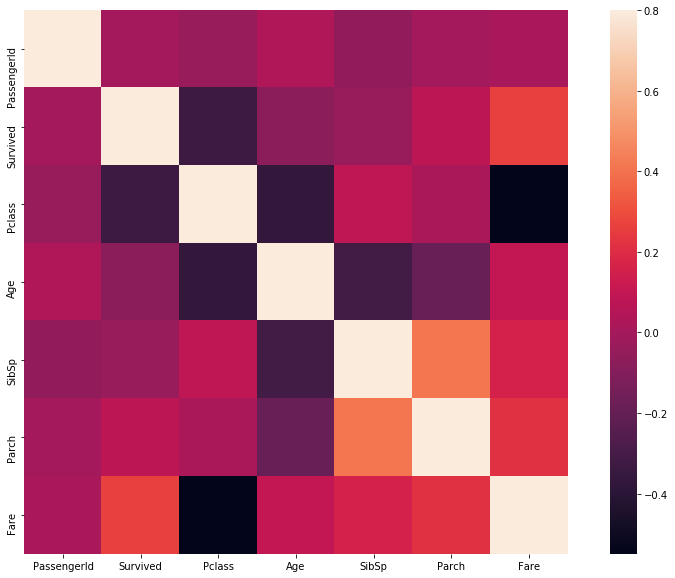

In [5]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corrmat, vmax=.8, square=True);

The above heatmap shows that there is a strong negative correlation between Pclass and the ticket fare. **This confirms our suspicion that the lower the Pclass higher the ticket fare. 1>2>3**. 

Also it seems that there is a **considerably strong relation between the survival rates and the ticket fare**, with it seeming that **higher the fare, higher the number of survivors.**

In [6]:
train.drop(['PassengerId'], axis=1, inplace=True)
test.drop(['PassengerId'], axis=1, inplace=True)

Passenger Id is a useless feature and cannot be used for our model.

In [7]:
train.describe(include=['O'])

#include=['O'] means we ask to describe only those parts of the training dataset that contain Python objects.

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Bissette, Miss. Amelia",male,CA. 2343,G6,S
freq,1,577,7,4,644


From the above description we can see that ticket numbers were not unique to each passenger and therefore multiple passengers may have the same ticket id. 

Now we will be analysing the dataset for each sub category within a particular categorical feaature to see which of the features has more of an influence on the survival rate. These are arranged in descending order of survival rates and corresponding to the sub cateogory.

In [8]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Passenger Class 1 had the highest no. of survivors whereas PClass 3 had the lowest no. of survivors

In [9]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Female passengers had almost 4 times higher percentage of survivors as compared to the male passengers

In [10]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


The people with only 1 sibling or spouse had the highest survival rate.

Those with 5 and 6 SibSp had no survivors.

In [11]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [12]:
#Experimental
train[["Fare", "Survived"]].groupby(['Fare'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Fare,Survived
247,512.3292,1.0
196,57.9792,1.0
89,13.8583,1.0
88,13.7917,1.0
86,13.4167,1.0
...,...,...
103,15.5500,0.0
180,47.1000,0.0
179,46.9000,0.0
178,42.4000,0.0


People with 4 and 6 Parents and/or Children aboard had no survivors.

In [13]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


The passengers who boarded from port C had the highest rate of survival and those from port S had the lowest survival rates.

__Port of embarkment__ may be a feature to be considered in the model for survival prediction

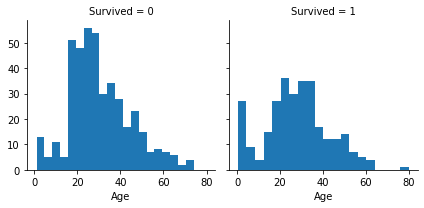

In [14]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

From this data it can be inferred that the passenger age is related to the passengers' survival.

**Insights gained from the above graph:**<br>
1.People aged approx 80 survived<br>2.Mostly young people didn't survive<br>3.The age 16-36 had some of the highest rates of non-survival and also of non survival.<br> &emsp; a.Which also means that the highest number of passengers were from the 16-36 age range<br>4.Age 64-76 had no survivors(more or less)

Since age has an influence on the survival rate we are going to have to complete the age category.

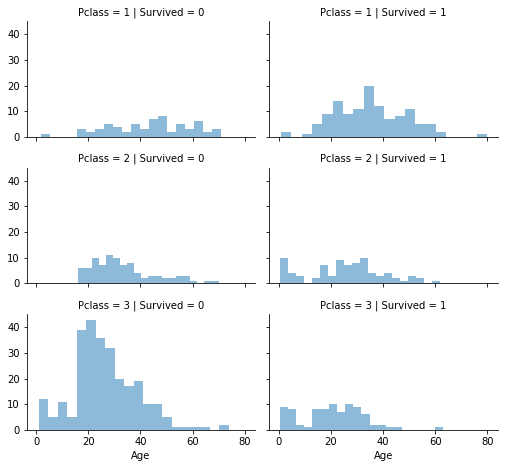

In [15]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

Pclass 1 had the highest survivors. Pclass 3 had the highest non-survivors.<br>The ages of 16-36 who were from Pclass 1 had high survivors.<br>The people of ages of 16-36 had highest non-survivors, especially those who were from Pclass 3 . 

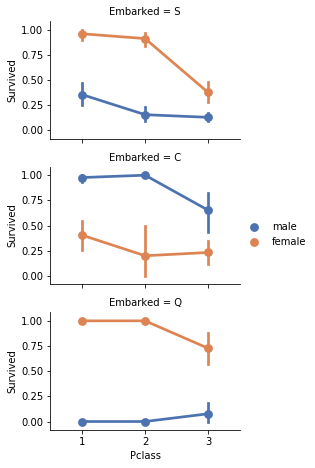

In [16]:
grid = sns.FacetGrid(train, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order=None, hue_order=None, palette='deep',)
grid.add_legend()

__Passenger class 3__ irrespective of their sex and port of embarkment __had a low rate of survival__.<br><br>Female passengers of Pclass 1 who boarded from port C and from port Q had a high rate of survival as compared to male passenger.<br><br>
Male passengers of Pclass 1 who boarded from port S had a high rate of survival as compared to female passenger.<br><br>
**Male passengers** irrespective of their Pclass **who boarded from port S had a low rate of survival as compared to female passenger.**

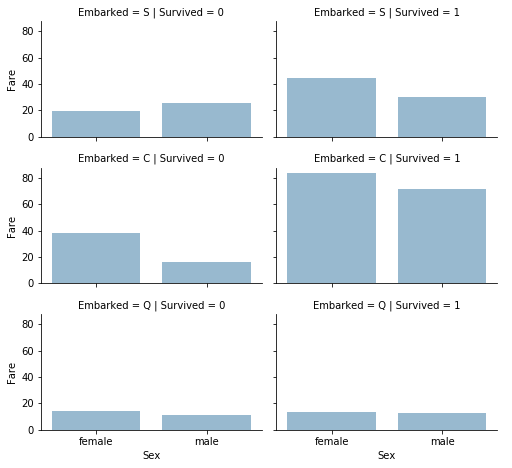

In [17]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', order=None, alpha=.5, ci=None)
grid.add_legend()

From the above graphs we can see that there are definitely **more survivors for a higher fare** irrespective of gender.

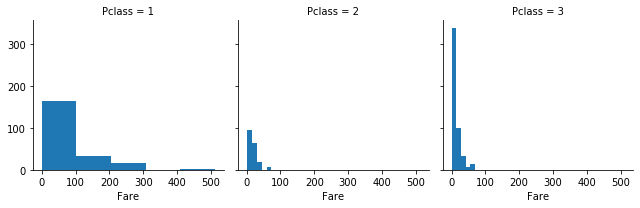

In [18]:
g = sns.FacetGrid(train, col='Pclass')
g.map(plt.hist, 'Fare', bins=5)

This graph proves our assumption that generally higher the Pclass lower the fares.

Pclass 2 had fewer people in genral.

In [19]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


The above table tells us which of the features in our **training dataset** is missing or has null entries in them, and quantises them.

Now we can see that for cabin around 78% of the entries are missing. Filling it with some other values is not an option anymore. Therefore it would be wiser to drop it.

In [20]:
#missing data
total_t = test.isnull().sum().sort_values(ascending=False)
percent_t = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data_t = pd.concat([total_t, percent_t], axis=1, keys=['Total_Test', 'Percent_Test'])
missing_data_t.head(10)

,Total_Test,Percent_Test
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
Embarked,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


The above table tells us which of the features in our **testing dataset** is missing or has null entries in them, and quantises them.

In [21]:
print("Before", train.shape, test.shape, combine[0].shape, combine[1].shape)

train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)
combine = [train, test]

print("After", train.shape, test.shape, combine[0].shape, combine[1].shape)

Before (891, 11) (418, 10) (891, 11) (418, 10)
After (891, 9) (418, 8) (891, 9) (418, 8)


In [22]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


Now we will get two more features by extracting the **Title** & **Length of the Name of the person**. 

This are the first instances of us  performing a step known as **FEATURE EXTRACTION or FEATURE ENGINEERING**, whereby we perfrom the task of either combining multiple features to derive a feature __OR__ we derive a feature from an existing feature which cannot be used otherwise to our advantage to make the model and would have been dropped.\

In our ML models, all the features need to be __scaled either up or down, i.e., normalised__. So, we now convert the actual feature values into categorical features depending on what band they fall into. Try using the actual feature values and see the errors generated once they are fed into the model.

In [23]:
train['Name_length'] = train['Name'].apply(len)
test['Name_length'] = test['Name'].apply(len)

In [24]:
train['Name_lengthCategory'] = pd.cut(train['Name_length'], 4)
train[['Name_lengthCategory', 'Survived']].groupby(['Name_lengthCategory'], as_index=False).mean().sort_values(by='Name_lengthCategory', ascending=True)

,Name_lengthCategory,Survived
0,"(11.93, 29.5]",0.295886
1,"(29.5, 47.0]",0.554054
2,"(47.0, 64.5]",0.852941
3,"(64.5, 82.0]",1.000000


The above table tells us the different bands of name lengths that our passengers' names could fall into

The step below makes use of the aforementioned bands to categorise the Name_length (a numerical feature).

In [25]:
for dataset in combine:    
    dataset.loc[(dataset['Name_length'] > 11) & (dataset['Name_length'] <= 29), 'Name_length'] = 0
    dataset.loc[(dataset['Name_length'] > 29) & (dataset['Name_length'] <=47 ), 'Name_length'] = 1
    dataset.loc[(dataset['Name_length'] > 47) & (dataset['Name_length'] <= 64), 'Name_length'] = 2
    dataset.loc[(dataset['Name_length'] > 64), 'Name_length'] = 3
    
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Name_length,Name_lengthCategory
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,"(11.93, 29.5]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,"(47.0, 64.5]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,"(11.93, 29.5]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,"(29.5, 47.0]"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,"(11.93, 29.5]"


Since we no longer need the Name_lengthCategory feature, we shall drop the feature from our model.

In [26]:
train = train.drop(['Name_lengthCategory'], axis=1)
combine = [train, test]
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Name_length
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0


Extracting Title feature from the name

In [27]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


The above table helps us determine what titles are male and female.

The rare titles are all being replaced by the term 'Rare'. The other non-English commoner titles are being replaced by English commoner titles

In [28]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [29]:
for dataset in combine:
    title_mapping = {"Master": 1, "Miss": 2, "Mr": 3,  "Mrs": 4,  "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,1,0.575000
1,2,0.702703
2,3,0.156673
3,4,0.793651
4,5,0.347826


In [30]:
#for dataset in combine:
mean_age_of_small_men=train.loc[train['Title'] ==1, 'Age'].mean()
mean_age_of_small_women=train.loc[train['Title'] ==2, 'Age'].mean()
mean_age_of_men=dataset.loc[dataset['Title'] ==3, 'Age'].mean()
mean_age_of_women=dataset.loc[dataset['Title'] ==4, 'Age'].mean()
mean_age_of_rare=dataset.loc[dataset['Title'] ==5, 'Age'].mean()


mean_age_of_small_men,mean_age_of_small_women,mean_age_of_men,mean_age_of_women,mean_age_of_rare

(4.574166666666667,
 21.845637583892618,
 32.0,
 38.903225806451616,
 43.833333333333336)

The above two tables tells the percentage of survivors for each of the titles in our dataset.<br><br>Therefore, there seems to be reason to believe that apart from the sex of the passengers there is a relation between the survival of the passengers and their titles.<br><br>Therefore we will consider the __Title__ as a feature for the prediction of survivability of the passengers.<br><br>It would seem that our previous assumption that men between 15-36 have a higher rate of non-survival is proven true given the mean corresponding the 'Mr' title<br><br>The assumption that younger passengers have a higher rate of survival is also proven true.<br><br>The output of the second table is calculating the mean ages of each of the title sub-categories. This would tell us that the titles are appropriate for their ages as is colloquial.<br><br>Therefore we will consider the __Age__ as a feature for the prediction of survivability of the passengers.

In [31]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Name_length,Title
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.335578,2.895623
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.565549,0.788465
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,2.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,3.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,3.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000,5.000000


The above table tells us that the maximum fare paid for a ticket to board the Titanic is $512.<br>
We also now know that the survival percentage is 38%, not that its useful in anyway<br>
The mean age of the passengers is 29.something that also confirms our observation that most of the passengers are in the age range of 16-36

Now that we have extracted the **Title** as a feature from the name of the passenger, there is no need of the Passenger Name feature and we can drop it.

In [32]:
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)
combine = [train, test]
train.shape, test.shape

((891, 10), (418, 9))

Now that name and passenger ID is dropped, we can move on to forming the model with the features we require.

Such as re-defining some of the categorical features<br>Such as <br> __Sex__: &emsp; Female:1 &emsp; Male:0<br>__Port of Embarkment__: &emsp; S:0 &emsp; Q:1 &emsp; C:2<br>**Title**: &emsp; Mr: 1 &emsp; Mrs: 2 &emsp; Master: 3 &emsp; Miss: 4 &emsp; Rare: 5<br>We also have to complete the **Age, Port of Embarkment and Fare columns** data column in the dataset. 

In [33]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_length,Title
0,0,3,0,22.0,1,0,7.2500,S,0,3
1,1,1,1,38.0,1,0,71.2833,C,2,4
2,1,3,1,26.0,0,0,7.9250,S,0,2
3,1,1,1,35.0,1,0,53.1000,S,1,4
4,0,3,0,35.0,0,0,8.0500,S,0,3


Ways of handling missing data are:<br>1.Listwise Deletion<br>2.Recover the Values<br><br>However, these are the __Methods of Imputation__, i.e., replacing the missing values with substitute values, which describes what we want to do<br><br> 3.Educated Guessing<br>4.Common-Point Imputation: Uses Median or Mode as the substitute but we need a good reason to use this <br>5.Regression Substitution<br>6.Average Imputation -> reduces data variability <br>7.Multiple Imputation<br><br>We will be using the method of __Multiple Imputation__

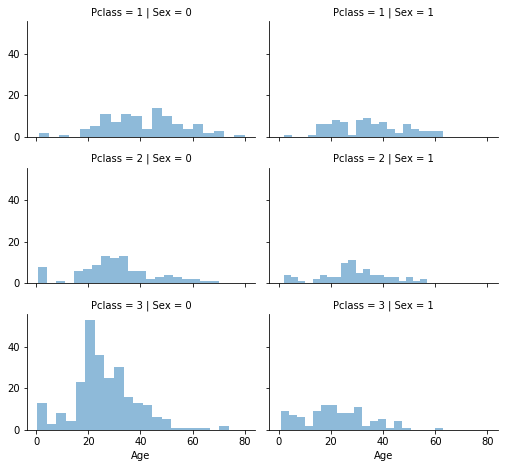

In [34]:
grid = sns.FacetGrid(train, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

We will be using the feature Pclass and the numeric categorical feature; Gender, to guess the missing __Age__ values.<br> An empty array **guess_ages** to contain guessed Age values based on Pclass and Gender combinations.<br><br>The procedure for the guessing is as shown in the comments in the cell below

In [35]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [36]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess.mean()
            # age_std = guess.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_length,Title
0,0,3,0,22,1,0,7.2500,S,0,3
1,1,1,1,38,1,0,71.2833,C,2,4
2,1,3,1,26,0,0,7.9250,S,0,2
3,1,1,1,35,1,0,53.1000,S,1,4
4,0,3,0,35,0,0,8.0500,S,0,3


In [37]:
train['AgeCategory'] = pd.cut(train['Age'], 5)
train[['AgeCategory', 'Survived']].groupby(['AgeCategory'], as_index=False).mean().sort_values(by='AgeCategory', ascending=True)

,AgeCategory,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


The above table tells us the different bands of Ages that our passengers' names could fall into.

The step below makes use of the aforementioned bands to categorise the Name_length (a numerical feature).

In [38]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_length,Title,AgeCategory
0,0,3,0,1,1,0,7.2500,S,0,3,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,2,4,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,0,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,1,4,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,0,3,"(32.0, 48.0]"


Since we no longer need the Name_lengthCategory feature, we shall drop the feature from our model and incorporate only the __Age__ feature.

In [39]:
train = train.drop(['AgeCategory'], axis=1)
combine = [train, test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_length,Title
0,0,3,0,1,1,0,7.2500,S,0,3
1,1,1,1,2,1,0,71.2833,C,2,4
2,1,3,1,1,0,0,7.9250,S,0,2
3,1,1,1,2,1,0,53.1000,S,1,4
4,0,3,0,2,0,0,8.0500,S,0,3


Instead of using two features; SibSp and Parch, we combine the two to make up a new feature __FamilySize__ .

In [40]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


The __FamilySize__ feature will now be used to determine if any of the passengers were alone or not depedning on the value. A new feature will be used instead named; __IsAlone__ that we will incorporate into our model.

In [41]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Using the feature __IsAlone__ in our model makes the features __Parch, SibSp, FamilySize__ redundant and we will drop them in the next cell as shown.

In [42]:
train = train.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test = test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train, test]

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Name_length,Title,IsAlone
0,0,3,0,1,7.2500,S,0,3,0
1,1,1,1,2,71.2833,C,2,4,0
2,1,3,1,1,7.9250,S,0,2,1
3,1,1,1,2,53.1000,S,1,4,0
4,0,3,0,2,8.0500,S,0,3,1


New Feature Again!!<br><br>The Age and Pclass features that we used to guess ages previously will now be combined to form a new feature based on the product of the two; __Age x Class__

In [43]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)


,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


We also noticed that some of the __Embarked__ feature values were missing. So we fill them out with the most frequently occuring value of the feature.

In [44]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(train.Embarked.dropna().mode()[0])

train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


Converting the __Embarked__ feature into an integer type categorical feature for incorporating in the model.

In [45]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Name_length,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,0,3,0,3
1,1,1,1,2,71.2833,1,2,4,0,2
2,1,3,1,1,7.9250,0,0,2,1,3
3,1,1,1,2,53.1000,0,1,4,0,2
4,0,3,0,2,8.0500,0,0,3,1,6


The procedure that was performed on the __NameLength and Age__ features, i.e.; Demarcation of the entire range of values into a fixed number of bands and then placing the varying individual feature values into the different feature bands, and hence, treating them as integer value categorical features, will be repeated with the __Fare__ feature as well.

In [ ]:
for dataset in combine:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
    
train['FareCategory'] = pd.qcut(train['Fare'], 4)
print (train[['FareCategory', 'Survived']].groupby(['FareCategory'], as_index=False).mean())

In [47]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train = train.drop(['FareCategory'], axis=1)
combine = [train, test]
    
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Name_length,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,0,3,0,3
1,1,1,1,2,3,1,2,4,0,2
2,1,3,1,1,1,0,0,2,1,3
3,1,1,1,2,3,0,1,4,0,2
4,0,3,0,2,1,0,0,3,1,6
5,0,3,0,1,1,2,0,3,1,3
6,0,1,0,3,3,0,0,3,1,3
7,0,3,0,0,2,0,1,1,0,0
8,1,3,1,1,1,0,2,4,0,3
9,1,2,1,0,2,1,1,4,0,0


Now with all the features we have obtained from the above code, we will plot a relational heatmap that will signify the correlation of the various features to each other and most importnatly to the __Survived__ feature.

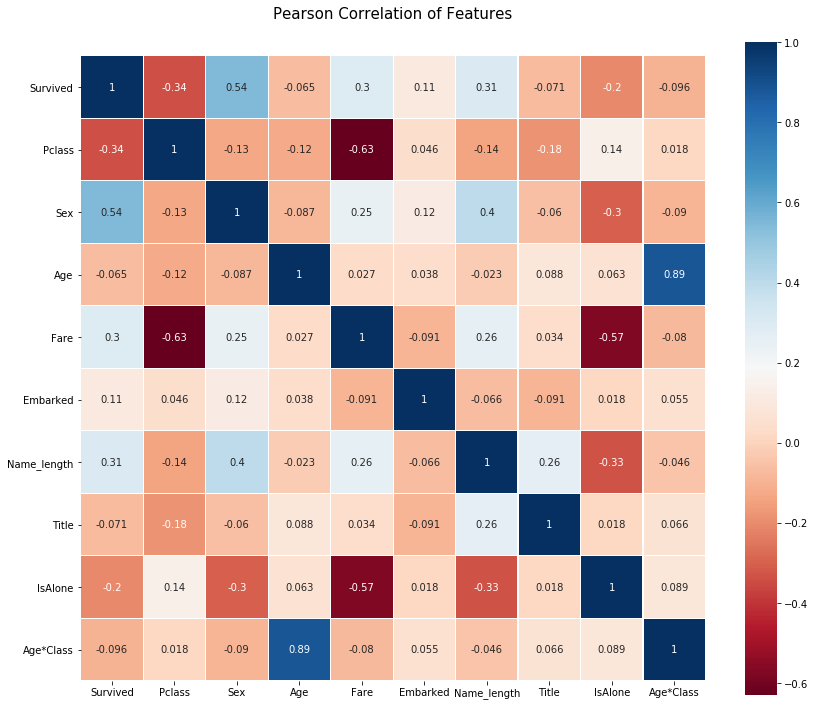

In [48]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Dropping the __Survived__ feature from the training set because that is what needs to be predicted from the tes set.

In [49]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 9), (891,), (418, 9))

This next block of code is where we import the capabilities of different models that we can on our set of features. <br><br>These many seem overwhelming but do not be. <br><br>We won't be using them all and the most accurate one will be used to make any predictions.<br><br> The rest are just for comparison's sake. 

In [50]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Name_length,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,0,3,0,3
1,1,1,1,2,3,1,2,4,0,2
2,1,3,1,1,1,0,0,2,1,3
3,1,1,1,2,3,0,1,4,0,2
4,0,3,0,2,1,0,0,3,1,6
5,0,3,0,1,1,2,0,3,1,3
6,0,1,0,3,3,0,0,3,1,3
7,0,3,0,0,2,0,1,1,0,0
8,1,3,1,1,1,0,2,4,0,3
9,1,2,1,0,2,1,1,4,0,0


The rest of the code just runs the models using our features and displays the accuracy percentage.<br><br>The last block of code ranks the accuracy percentages of all the models we have run in decending order.

In [51]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.81

In [52]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.244316
5,Name_length,0.729328
4,Embarked,0.325836
2,Age,0.212004
7,IsAlone,0.054376
3,Fare,-0.090235
8,Age*Class,-0.234490
6,Title,-0.346314
0,Pclass,-0.895270


In [53]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

79.57

In [54]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

85.52

In [55]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.17

In [56]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

62.74

In [57]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\Users\Intel\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


79.69

In [58]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

79.24

In [59]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

88.66

In [60]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

88.66

In [61]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,88.66
8,Decision Tree,88.66
1,KNN,85.52
2,Logistic Regression,80.81
7,Linear SVC,79.69
0,Support Vector Machines,79.57
6,Stochastic Gradient Decent,79.24
4,Naive Bayes,72.17
5,Perceptron,62.74
